<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/labs/cs473_lab_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 473 Lab Week 3

## Introduction:
In this lab, we'll explore both multivariate Gaussians and mixture models.

Mixture models are a powerful way to combine simple distributions to create complex distributions. Gaussian mixture modeling is a common place to start, because of the attractive theoretical properties of the model.

---
## Exercise #1: Data Generation
First, we'll practice sampling from a mixture model.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg

def sample_mm( Mu, Sigma, Weight ):
    # Mu is a list of length k. Each entry in the list is a dx1 vector, representing the mean of the corresponding mixture component
    # Sigma is a list of length k. Each entry is a dxd matrix, representing the corresponding covariance matrix
    # Weight is a list of length k. Each entry is a 1x1 scalar, representing the prior probability of that component
    #
    # Your code should return a single sample from the mixture. It should be a dx1 vector.

    # NOTE: the only sampling functions you can use are np.random.randn and np.random.choice (don't use np.random.multivariate_normal)
    # you can use other math functions as needed
    # HINT: Look at section 7.6.3 of the book for a way to sample from a Multivariate Gaussian

    k = len(Weight)
    component = np.random.choice(k, p=Weight)

    mu = Mu[component]
    sigma = Sigma[component]
    d = mu.shape[0]
    L = np.linalg.cholesky(sigma)
    z = np.random.randn(d, 1)
    x = mu + L @ z

    return x


In [15]:
# our mixture model

mu_1 = np.array([[0.22], [0.45]])
mu_2 = np.array([[0.5], [0.5]])
mu_3 = np.array([[0.77], [0.55]])
Mu = np.array([mu_1, mu_2, mu_3])

Sigma1 = np.array([[0.011, -0.01], [-0.01, 0.018]])
Sigma2 = np.array([[0.018, 0.01], [0.01, 0.011]])
Sigma3 = Sigma1
Sigma = np.array([Sigma1, Sigma2, Sigma3])

### Now, visualize the results and compare to the expected shapes
Here is some simple code for visualizing the level sets of a Gaussian

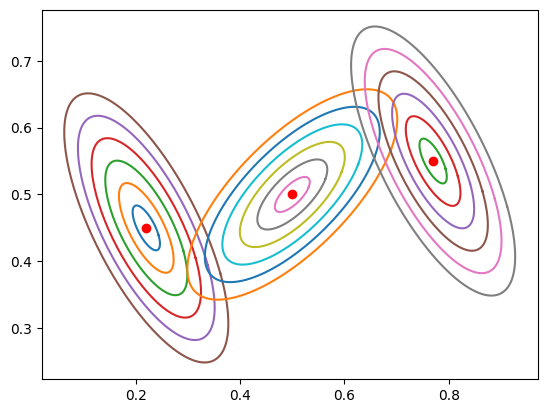

In [16]:
import matplotlib.pyplot as plt
from scipy import linalg

Weight = [1/3, 1/3, 1/3]

def sigmaEllipse2D(mu, Sigma, level=3, npoints=128):
    """
    SIGMAELLIPSE2D generates x,y-points which lie on the ellipse describing
    a sigma level in the Gaussian density defined by mean and covariance.

    Input:
        MU          [2 x 1] Mean of the Gaussian density
        SIGMA       [2 x 2] Covariance matrix of the Gaussian density
        LEVEL       Which sigma level curve to plot. Can take any positive value,
                    but common choices are 1, 2 or 3. Default = 3.
        NPOINTS     Number of points on the ellipse to generate. Default = 32.

    Output:
        XY          [2 x npoints] matrix. First row holds x-coordinates, second
                    row holds the y-coordinates. First and last columns should
                    be the same point, to create a closed curve.
    """
    phi = np.linspace(0, 2 * np.pi, npoints)
    x = np.cos(phi)
    y = np.sin(phi)
    z = level * np.vstack((x, y))
    xy = mu + linalg.sqrtm(Sigma).dot(z)
    return xy

def plot_sigma_levels(mu, P):
    xy_1 = sigmaEllipse2D(mu, P, 0.25)
    xy_2 = sigmaEllipse2D(mu, P, 0.5)
    xy_3 = sigmaEllipse2D(mu, P, 0.75)
    xy_4 = sigmaEllipse2D(mu, P, 1)
    xy_5 = sigmaEllipse2D(mu, P, 1.25)
    xy_6 = sigmaEllipse2D(mu, P, 1.5)
    plt.plot(xy_1[0], xy_1[1])
    plt.plot(xy_2[0], xy_2[1])
    plt.plot(xy_3[0], xy_3[1])
    plt.plot(xy_4[0], xy_4[1])
    plt.plot(xy_5[0], xy_5[1])
    plt.plot(xy_6[0], xy_6[1])
    plt.plot(mu[0], mu[1], "ro")


for i in range( len(Mu) ):
    plot_sigma_levels(Mu[i], Sigma[i])

Sampling 10000 points from the mixture model:


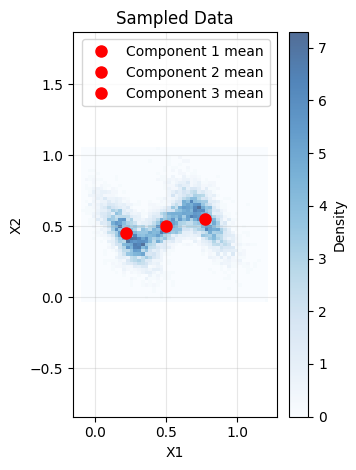

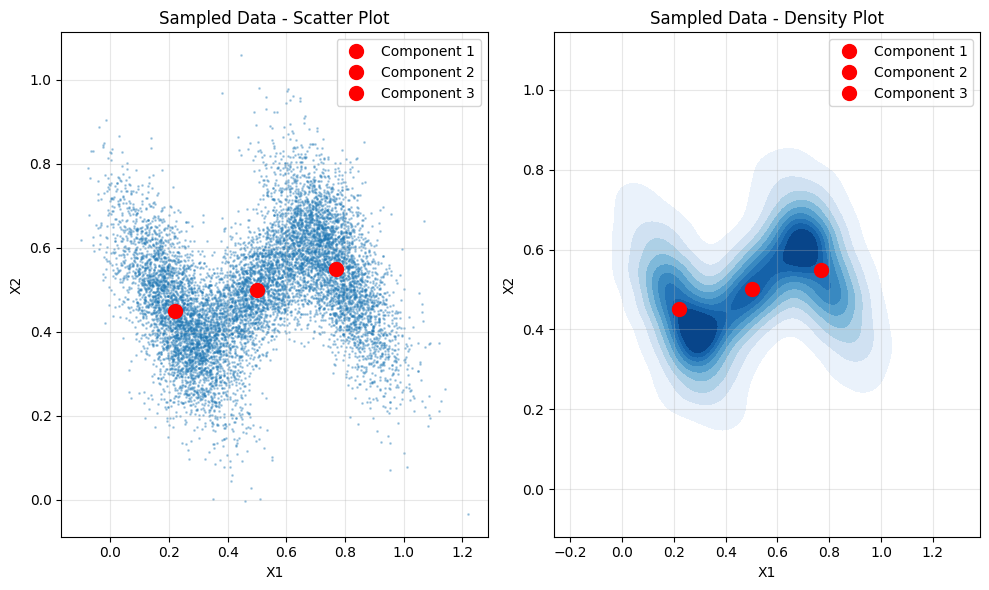

Sample statistics:
Mean: [0.496, 0.499]
Std:  [0.252, 0.132]

Theoretical mixture mean: [0.497, 0.500]
Empirical mean: [0.496, 0.499]
Difference: [0.001, 0.001]


In [17]:
# sample data

N = 10000
print(f"Sampling {N} points from the mixture model:")
results = [ sample_mm( Mu, Sigma, Weight ) for _ in range(N) ]

samples = np.hstack(results)
x_samples = samples[0, :]
y_samples = samples[1, :]

plt.subplot(1, 2, 2)
plt.title('Sampled Data')

plt.hist2d(x_samples, y_samples, bins=50, density=True, alpha=0.7, cmap='Blues')
plt.colorbar(label='Density')

for i, mu in enumerate(Mu):
    plt.plot(mu[0], mu[1], "ro", markersize=8, label=f'Component {i+1} mean')

plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Sampled Data - Scatter Plot')
plt.scatter(x_samples, y_samples, alpha=0.3, s=1)
for i, mu in enumerate(Mu):
    plt.plot(mu[0], mu[1], "ro", markersize=10, label=f'Component {i+1}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.title('Sampled Data - Density Plot')
sns.kdeplot(x=x_samples, y=y_samples, levels=10, cmap='Blues', fill=True)
for i, mu in enumerate(Mu):
    plt.plot(mu[0], mu[1], "ro", markersize=10, label=f'Component {i+1}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Sample statistics:")
print(f"Mean: [{np.mean(x_samples):.3f}, {np.mean(y_samples):.3f}]")
print(f"Std:  [{np.std(x_samples):.3f}, {np.std(y_samples):.3f}]")

theoretical_mean = np.sum([Weight[i] * Mu[i].flatten() for i in range(len(Mu))], axis=0)
empirical_mean = [np.mean(x_samples), np.mean(y_samples)]

print(f"\nTheoretical mixture mean: [{theoretical_mean[0]:.3f}, {theoretical_mean[1]:.3f}]")
print(f"Empirical mean: [{empirical_mean[0]:.3f}, {empirical_mean[1]:.3f}]")
print(f"Difference: [{abs(theoretical_mean[0] - empirical_mean[0]):.3f}, {abs(theoretical_mean[1] - empirical_mean[1]):.3f}]")

---
## Exercise #2: Marginals
One way to sample from a marginal distribution is to sample from a joint distribution, and throw away the variables that have been marginalized out.  We're going to compare empirical and exact distributions.

You should perform the following:

* Sample from a multivariate Gaussian p(x,y) with the given parameters
* For each sample, throw away the second number (the "y" coordinate)
* Plot the resulting distribution of datapoints

Then, use the equations in the book to calculate the exact density of the marginal distribution over the first dimension (the "x" variable)


In [18]:
# Use these parameters
mu = np.array([[0.22], [0.45]])
sigma = np.array([[0.011, -0.01], [-0.01, 0.018]])

mu = np.array([[0.22], [0.45]])
sigma = np.array([[0.011, -0.01], [-0.01, 0.018]])

def sample_multivariate_gaussian(mu, sigma, n_samples):
  d = mu.shape[0]
  L = np.linalg.cholesky(sigma)
  samples = []

  for _ in range(n_samples):
      z = np.random.randn(d, 1)
      x = mu + L @ z
      samples.append(x.flatten())

  return np.array(samples)
# Sample
# Plot the empirical distribution of points (using, for example, a histogram plotting function)
# Plot the true density curve


Now, calculate the density of several points:

* Calculate p(y=0.39)
* Calculate p(y=0.2)

Sampled 10000 points from joint distribution
Extracted x-coordinates to get marginal distribution samples

Exact marginal distribution p(x):
Mean (μ_x): 0.22
Variance (σ_x²): 0.011
Standard deviation (σ_x): 0.10488088481701516


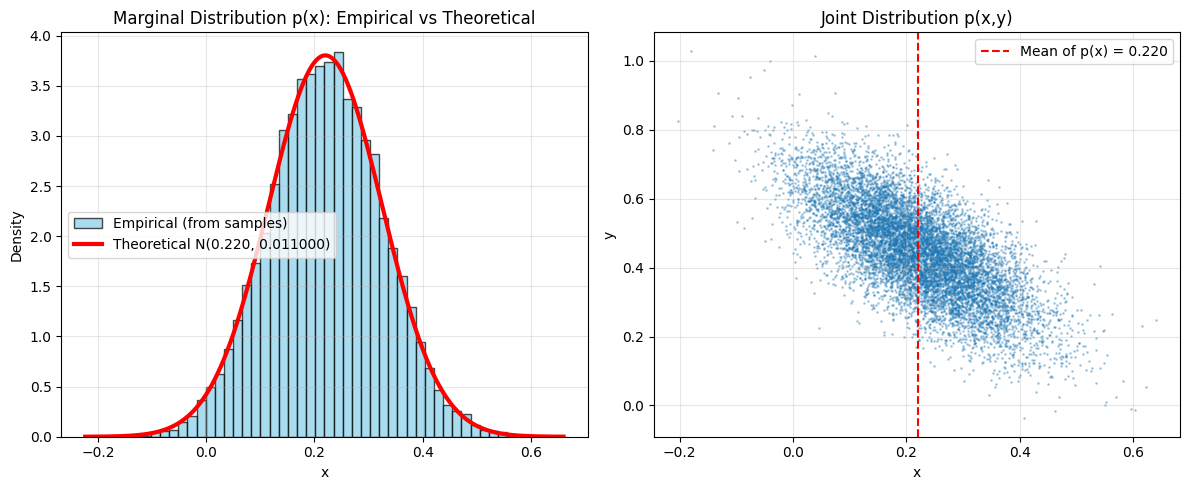


Density calculations:
p(x = 0.39) = 1.022607
p(x = 0.2) = 3.735231

Verification using scipy:
p(x = 0.39) = 1.022607
p(x = 0.2) = 3.735231

Statistical verification:
Theoretical mean: 0.220000, Empirical mean: 0.221333
Theoretical std: 0.104881, Empirical std: 0.104387


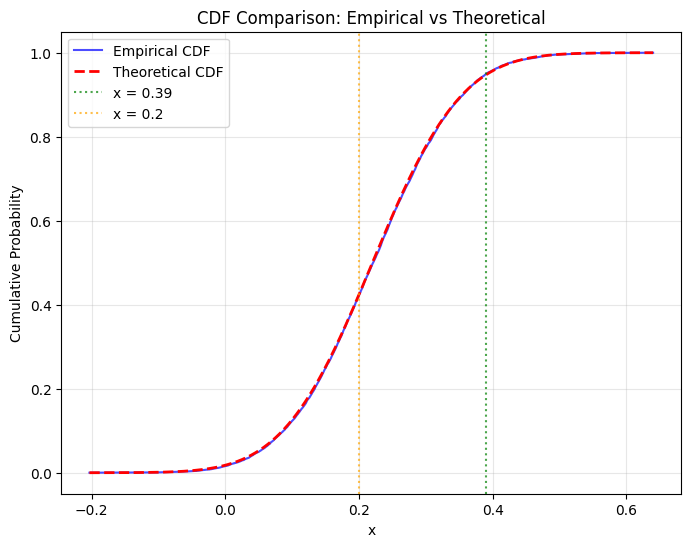

In [20]:
from scipy.stats import norm

n_samples = 10000
joint_samples = sample_multivariate_gaussian(mu, sigma, n_samples)

x_samples = joint_samples[:, 0]

print(f"Sampled {n_samples} points from joint distribution")
print(f"Extracted x-coordinates to get marginal distribution samples")

mu_x_marginal = mu[0, 0]
sigma_x_marginal = sigma[0, 0]
std_x_marginal = np.sqrt(sigma_x_marginal)

print(f"\nExact marginal distribution p(x):")
print(f"Mean (μ_x): {mu_x_marginal}")
print(f"Variance (σ_x²): {sigma_x_marginal}")
print(f"Standard deviation (σ_x): {std_x_marginal}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x_samples, bins=50, density=True, alpha=0.7, color='skyblue',
         edgecolor='black', label='Empirical (from samples)')

x_range = np.linspace(x_samples.min() - 0.02, x_samples.max() + 0.02, 1000)
theoretical_density = norm.pdf(x_range, mu_x_marginal, std_x_marginal)
plt.plot(x_range, theoretical_density, 'red', linewidth=3,
         label=f'Theoretical N({mu_x_marginal:.3f}, {sigma_x_marginal:.6f})')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Marginal Distribution p(x): Empirical vs Theoretical')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
y_samples = joint_samples[:, 1]
plt.scatter(x_samples, y_samples, alpha=0.3, s=1)
plt.axvline(x=mu_x_marginal, color='red', linestyle='--',
           label=f'Mean of p(x) = {mu_x_marginal:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Joint Distribution p(x,y)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDensity calculations:")

x_val1 = 0.39
x_val2 = 0.2

def gaussian_pdf(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-0.5 * ((x - mu) ** 2) / sigma)

p_x_039 = gaussian_pdf(x_val1, mu_x_marginal, sigma_x_marginal)
p_x_02 = gaussian_pdf(x_val2, mu_x_marginal, sigma_x_marginal)

print(f"p(x = {x_val1}) = {p_x_039:.6f}")
print(f"p(x = {x_val2}) = {p_x_02:.6f}")

p_x_039_scipy = norm.pdf(x_val1, mu_x_marginal, std_x_marginal)
p_x_02_scipy = norm.pdf(x_val2, mu_x_marginal, std_x_marginal)

print(f"\nVerification using scipy:")
print(f"p(x = {x_val1}) = {p_x_039_scipy:.6f}")
print(f"p(x = {x_val2}) = {p_x_02_scipy:.6f}")

print(f"\nStatistical verification:")
print(f"Theoretical mean: {mu_x_marginal:.6f}, Empirical mean: {np.mean(x_samples):.6f}")
print(f"Theoretical std: {std_x_marginal:.6f}, Empirical std: {np.std(x_samples, ddof=1):.6f}")

plt.figure(figsize=(8, 6))
x_sorted = np.sort(x_samples)
empirical_cdf = np.arange(1, len(x_sorted) + 1) / len(x_sorted)
theoretical_cdf = norm.cdf(x_sorted, mu_x_marginal, std_x_marginal)

plt.plot(x_sorted, empirical_cdf, 'b-', alpha=0.7, label='Empirical CDF')
plt.plot(x_sorted, theoretical_cdf, 'r--', linewidth=2, label='Theoretical CDF')
plt.axvline(x=x_val1, color='green', linestyle=':', alpha=0.7, label=f'x = {x_val1}')
plt.axvline(x=x_val2, color='orange', linestyle=':', alpha=0.7, label=f'x = {x_val2}')

plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('CDF Comparison: Empirical vs Theoretical')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
## Exercise #3: Conditionals
Now, let's explore the difference between marginals and conditionals.

Use the following joint distribution over 4 variables:

In [21]:
import seaborn as sns

df = sns.load_dataset("penguins")

data = np.array( df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
data = data[~np.isnan(data).any(axis=1)] # drop any row with a NaN
data[:,2] /= 200 # scale some stuff
data[:,3] /= 3000

mu = np.mean( data, axis=0 )
sigma = np.cov( data.T )

In [22]:
print(mu)
print(sigma)

[43.92192982 17.15116959  1.00457602  1.4005848 ]
[[ 2.98070543e+01 -2.53423394e+00  2.51878826e-01  8.68530637e-01]
 [-2.53423394e+00  3.89980801e+00 -8.10647519e-02 -2.49123364e-01]
 [ 2.51878826e-01 -8.10647519e-02  4.94329479e-03  1.63740268e-02]
 [ 8.68530637e-01 -2.49123364e-01  1.63740268e-02  7.14590086e-02]]


We'll assume that we have a multivariate normal distribution over 4 variables: p(x1,x2,x3,x4) = N( mu, sigma )

Now, we want to compute the mean of various conditionals

In [23]:
# Compute the parameters of p(x2,x3)  (a marginal)
marginal_indices = [1, 2]

marg_mu_x2_x3 = mu[marginal_indices]
marg_sigma_x2_x3 = sigma[np.ix_(marginal_indices, marginal_indices)]

print( marg_mu_x2_x3 )
print( marg_sigma_x2_x3 )

[17.15116959  1.00457602]
[[ 3.89980801 -0.08106475]
 [-0.08106475  0.00494329]]


In [24]:
# Compute the parameters or p(x2,x3|x1=34,x4=1.2)
x1_given = 34
x4_given = 1.2
x_given = np.array([x1_given, x4_given])

observed_indices = [0, 3]  # x1, x4
target_indices = [1, 2]    # x2, x3

mu_target = mu[target_indices]
mu_observed = mu[observed_indices]
sigma_target = sigma[np.ix_(target_indices, target_indices)]
sigma_observed = sigma[np.ix_(observed_indices, observed_indices)]
sigma_cross = sigma[np.ix_(target_indices, observed_indices)]


sigma_inv = np.linalg.inv(sigma_observed)
cond_mu_x2_x3 = mu_target + sigma_cross @ sigma_inv @ (x_given - mu_observed)

cond_sigma_x2_x3 = sigma_target - sigma_cross @ sigma_inv @ sigma_cross.T


print( cond_mu_x2_x3 )
print( cond_sigma_x2_x3 )

[17.65853443  0.93806238]
[[ 3.01864381e+00 -2.53366277e-02]
 [-2.53366277e-02  1.04619779e-03]]


In [25]:
# Finally, calculate the density of a specific point:
from scipy.stats import multivariate_normal
# calculate p(x2=16, x3=0.99)
x2_point = 16
x3_point = 0.99
query_point = np.array([x2_point, x3_point])

marginal_density = multivariate_normal.pdf(query_point, marg_mu_x2_x3, marg_sigma_x2_x3)
print(f"p(x2={x2_point}, x3={x3_point}) = {marginal_density:.8f}")

conditional_density = multivariate_normal.pdf(query_point, cond_mu_x2_x3, cond_sigma_x2_x3)
print(f"p(x2={x2_point}, x3={x3_point} | x1={x1_given}, x4={x4_given}) = {conditional_density:.8f}")


print()

# calculate p(x2=16, x3=0.99 | x1=34,x4=1.2)
print()

p(x2=16, x3=0.99) = 0.94887083
p(x2=16, x3=0.99 | x1=34, x4=1.2) = 0.84539751


